# About Dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

# Setup and import

In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as mtick

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
file_name = 'ds_salaries.csv'

try: 
    df = pd.read_csv(file_name) ##in case of running locally
except:
    df = pd.read_csv('/kaggle/input/jobs-in-data/' + file_name) ##in case of running on kaggle

salaries = df

In [3]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
## Let's check how many job_titles there are, and how representative each one is
titles = pd.DataFrame([
    salaries.job_title.value_counts(normalize=False),
    salaries.job_title.value_counts(normalize=True).map('{:.1%}'.format),
    salaries.job_title.value_counts(normalize=True).cumsum().map('{:.1%}'.format),
]).T

titles.columns = ['Count', "Proportion","Cumm. Proportion"]
titles

,Count,Proportion,Cumm. Proportion
job_title,,,
Data Engineer,1040,27.7%,27.7%
Data Scientist,840,22.4%,50.1%
Data Analyst,612,16.3%,66.4%
Machine Learning Engineer,289,7.7%,74.1%
Analytics Engineer,103,2.7%,76.8%
...,...,...,...
Principal Machine Learning Engineer,1,0.0%,99.9%
Azure Data Engineer,1,0.0%,99.9%
Manager Data Management,1,0.0%,99.9%


# Data Cleaning Strategy

- **Replacing Acronyms**: Personally I do not like to use acronyms for EDAs, so we will be using a external data source to substitute the country names. 
  
- **Monetary Values**: No need to look into other currencies if we have the salaries in USD for everyone. Also let's look into thousands of dollars
  
- **3 Big Fields**: So there is more than 80 "job_titles", in the dataset, which will make our analysis more difficult. In my view most of the data jobs can enter the big umbrella of 3 main fields: Data Science, Data Engineering and Data Analysis. Do we will scrape the job_title column for keywords that associate each job with each big field

- **Remote Class**: Let's categorize our workers into "fully remote", "Fully in person", or "Hybrid"

# Replacing acronyms

Personally I do not like to use acronyms for EDAs

In [5]:
# Replacing Acronyms for countries

country_iso3166 = pd.read_html("https://www.iban.com/country-codes")
country_iso3166 = country_iso3166[0].drop(['Alpha-3 code','Numeric'], axis = 'columns')

# The full name of USA and Britain is a little big, so I'll reduce it to more readable form
country_iso3166['Country'] = country_iso3166['Country'].replace({'United States of America (the)': 'United States', 'United Kingdom of Great Britain and Northern Ireland (the)': 'Britain'})

# we create a dictionary to convert acronyms to country names
country_dict = country_iso3166.set_index('Alpha-2 code')['Country'].to_dict()

# finally replacing the values in the dataframe
salaries['company_location'] = salaries['company_location'].replace(country_dict)
salaries['employee_residence'] = salaries['employee_residence'].replace(country_dict)

In [6]:
# Other replacements

# Experience level
salaries['experience_level'] = salaries['experience_level'].replace(
    {'EN': 'Entry-Level',
     'MI': 'Mid-Level'  ,
     'SE': 'Senior'     ,
     'EX': 'Executive'} 
)

# Company Size
salaries['company_size'] = salaries['company_size'].replace(
    {'S': 'Small'   ,
     'M': 'Medium'  ,
     'L': 'Large'   }
)

In [7]:
salaries['experience_level'] = salaries['experience_level'].replace({'EN': 'Entry-Level', 'MI' : 'Mid-Level', 'SE': 'Senior', 'EX': 'Executive'})

In [8]:
# Let's only look into salaries in kUSD
salaries['salary_in_kusd'] = salaries['salary_in_usd']/1000
salaries['salary_in_kusd'] = salaries['salary_in_kusd'].astype(int)
salaries = salaries.drop(['salary', 'salary_currency', 'salary_in_usd'], axis = 'columns')
salaries

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_kusd
0,2023,Senior,FT,Principal Data Scientist,Spain,100,Spain,Large,85
1,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,30
2,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,25
3,2023,Senior,FT,Data Scientist,Canada,100,Canada,Medium,175
4,2023,Senior,FT,Data Scientist,Canada,100,Canada,Medium,120
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,FT,Data Scientist,United States,100,United States,Large,412
3751,2021,Mid-Level,FT,Principal Data Scientist,United States,100,United States,Large,151
3752,2020,Entry-Level,FT,Data Scientist,United States,100,United States,Small,105
3753,2020,Entry-Level,CT,Business Data Analyst,United States,100,United States,Large,100


# Categorizing jobs in the 3 Big Fields

In [9]:
pd.DataFrame(salaries.job_title.value_counts(normalize=True)).drop('proportion',axis=1)

""
job_title
Data Engineer
Data Scientist
Data Analyst
Machine Learning Engineer
Analytics Engineer
...
Principal Machine Learning Engineer
Azure Data Engineer
Manager Data Management


The following titles were not categorized in the 3 big fields:
0                  Data Strategist
1                     Head of Data
2                     Data Manager
3                  Data Specialist
4    Autonomous Vehicle Technician
5                        Data Lead
6          Manager Data Management
7    3D Computer Vision Researcher
8       Data Management Specialist
Name: job_title, dtype: object


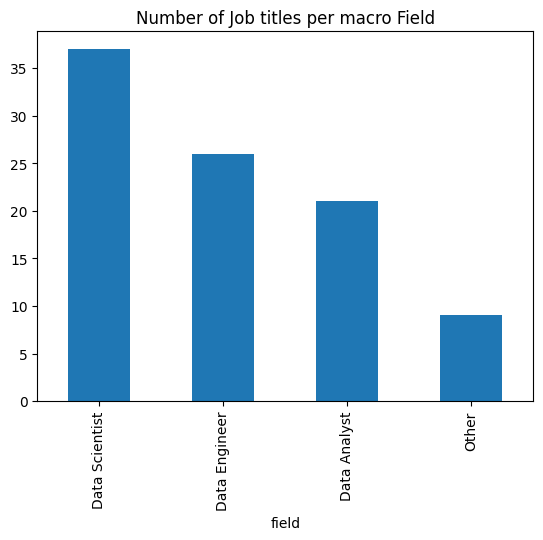

In [10]:
## The strategy is to create a dictionary to then convert the job_titles to job fields

## first, we create the df with all the job_titles
titles = pd.DataFrame(salaries.job_title.unique(), columns = ['job_title']).set_index('job_title')


# Now we create a Dictionary of keywords for each field
Data_Science_keywords = {
    "Data Scientist": ['Science', 'Scientist', 'AI', 'ML', 'Machine Learning', 'Deep Learning', 'Model'],
    'Data Engineer' : ['Engineer', 'Engineering', 'Architect', 'DB', 'Database', 'Azure', 'ETL'],
    'Data Analyst'  : ['Analyst', 'Analysis', 'Analytic', 'Business', 'BI']
}

titles['field'] = 'Other'

for job_title in titles.index:
    for macro_function in Data_Science_keywords.keys():
        if any(keyword in job_title for keyword in Data_Science_keywords[macro_function]):
            titles.loc[job_title, 'field'] = macro_function
            break

titles.groupby('field').value_counts().sort_values(ascending=False).plot(kind='bar', title= 'Number of Job titles per macro Field')

print('The following titles were not categorized in the 3 big fields:')
print(titles[titles['field']=='Other'].reset_index()['job_title'])

In [11]:
salaries['field'] = salaries['job_title'].replace(titles['field'].to_dict())

In [12]:
salaries['field'].value_counts(normalize=True)

field
Data Scientist    0.420240
Data Engineer     0.369108
Data Analyst      0.193342
Other             0.017310
Name: proportion, dtype: float64

In [13]:
##with just a little over 1% of the dataset not categorized, I believe it is fair to just drop those lines and continue the work with the 3 big fields
salaries = salaries[salaries['field']!='Other']

# Creating Remote Ratio Class

In [14]:
def ratio_class(ratio):
    if ratio == 100:
        return 'Remote'
    elif ratio == 0:
        return 'In-Person'
    else:
        return 'Hybrid'

In [15]:
salaries['ratio_class'] = salaries['remote_ratio'].apply(ratio_class)
salaries['ratio_class'].value_counts()

C:\Users\lsnga\AppData\Local\Temp\ipykernel_25752\2063592463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['ratio_class'] = salaries['remote_ratio'].apply(ratio_class)


ratio_class
In-Person    1880
Remote       1626
Hybrid        184
Name: count, dtype: int64

# Jobs Growth

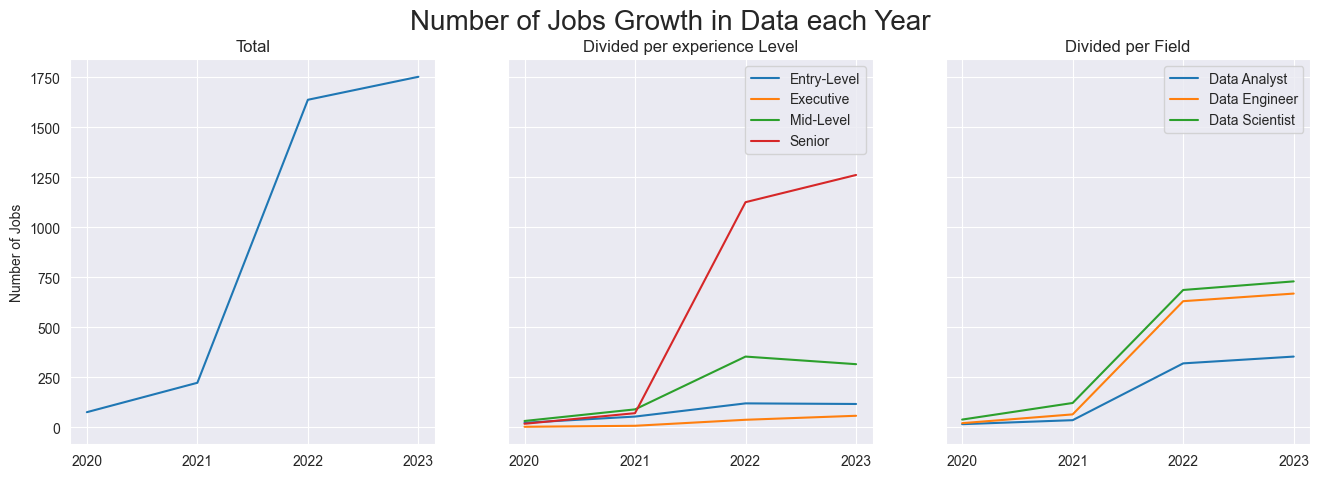

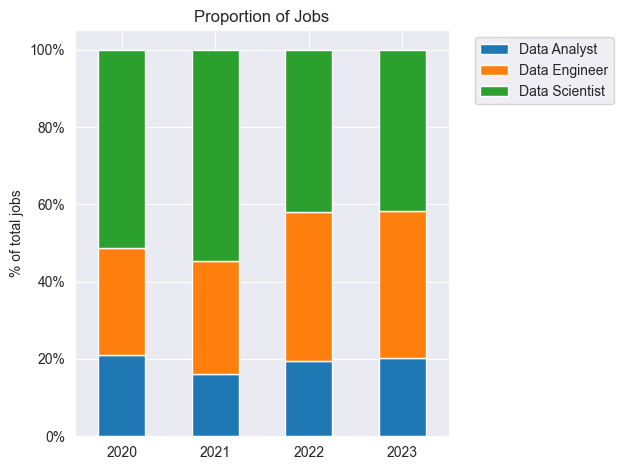

In [16]:
## I will be using seaborn lineplot to show the growth. Unfortunatelly there is no estimator = count() for seaborn (what's up with that????)
## so first we need to create new DF that counts the number of rows (jobs) for each field and experience level
counts_exp = salaries.groupby(by = ['work_year', 'experience_level']).size().reset_index(name = 'counts')
counts_field = salaries.groupby(by = ['work_year', 'field']).size().reset_index(name = 'counts')

# Creating the suplot
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,3, figsize = (16,5), sharey = True)
fig.suptitle('Number of Jobs Growth in Data each Year', fontsize = 20)


## Plotting the total number growth
sns.lineplot(
    ax=axes[0],
    data = counts_exp.groupby('work_year').sum(),
    x = "work_year",
    y = 'counts',
    errorbar = None
)
axes[0].set_xticks(counts_exp['work_year'].unique())
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Jobs')
axes[0].set_title('Total')

## Plotting the growth per experience level
sns.lineplot(
    ax=axes[1],
    data = counts_exp,
    x = "work_year",
    y = 'counts',
    hue = 'experience_level',
)
axes[1].set_xticks(counts_exp['work_year'].unique())
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Divided per experience Level')
axes[1].legend(title='')

## Plotting the growth per field
sns.lineplot(
    ax=axes[2],
    data = counts_field,
    x = "work_year",
    y = 'counts',
    hue = 'field',
)
axes[2].set_xticks(counts_field['work_year'].unique())
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('Divided per Field')
axes[2].legend(title='')

## Plotting the proportions
ax = salaries.groupby('work_year')['field'].value_counts(normalize=True).unstack('field').plot(kind ='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('')
ax.set_title('Proportion of Jobs')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('% of total jobs')

plt.tight_layout()
plt.show()

- Great growth in job numbers for all the fields. 
- Senior positions are the most required and the ones that grew the most in the last three years.
- The proportion between analysts, scientists and Engineers are relatively stable

# 2023 Job locations

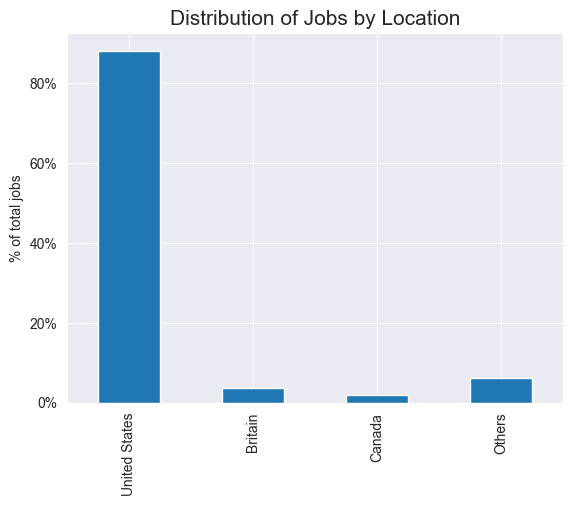

In [17]:

df_2023 = salaries[salaries['work_year']==2023]
top_countries = pd.DataFrame(df_2023.company_location.value_counts(normalize=True).head(3))
total_top_countries = top_countries.sum()
top_countries.loc['Others'] = 1-total_top_countries
ax = top_countries['proportion'].plot(kind = 'bar')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('% of total jobs')
ax.set_xlabel('')
ax.set_title('Distribution of Jobs by Location', fontsize = 15)
plt.show()

# Salary Growth

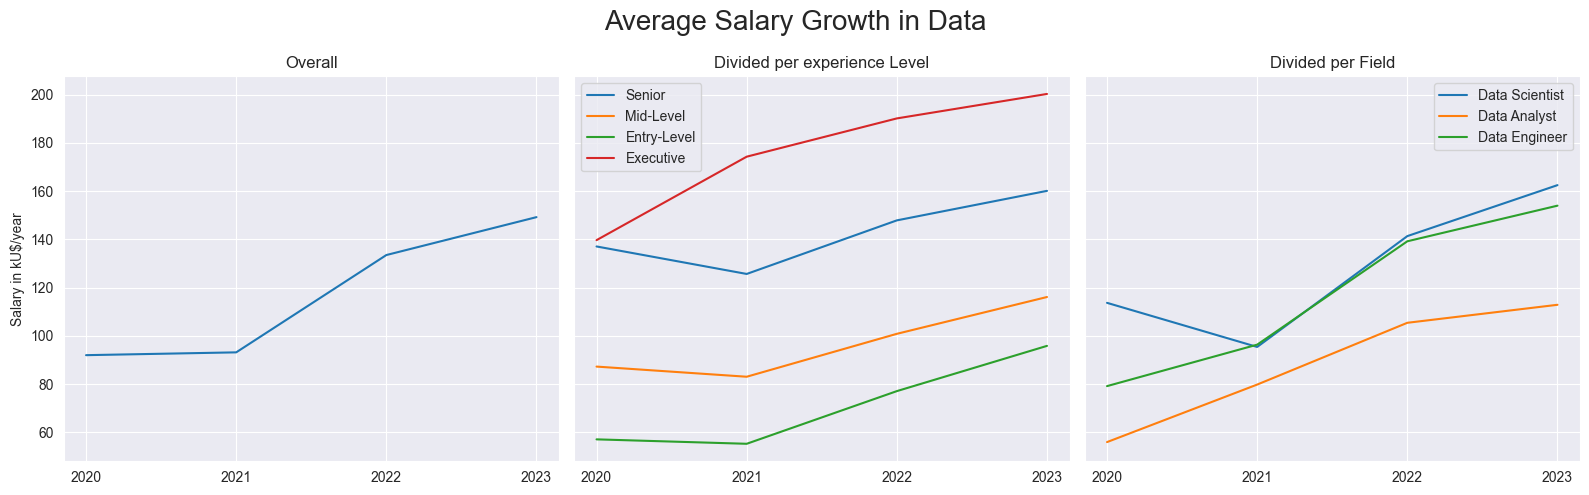

In [18]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1,3, figsize = (16,5), sharey = True)
fig.suptitle('Average Salary Growth in Data', fontsize = 20)


sns.lineplot(
    ax=axes[0],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    estimator = 'mean',
    errorbar = None
)
axes[0].set_xticks(counts_exp['work_year'].unique())
axes[0].set_xlabel('')
axes[0].set_ylabel('Salary in kU$/year')
axes[0].set_title('Overall')

sns.lineplot(
    ax=axes[1],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    hue = 'experience_level',
    estimator = 'mean',
    errorbar = None
)
axes[1].set_xticks(counts_exp['work_year'].unique())
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Divided per experience Level')
axes[1].legend(title='')

sns.lineplot(
    ax=axes[2],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    hue = 'field',
    estimator = 'mean',
    errorbar = None
)
axes[2].set_xticks(counts_field['work_year'].unique())
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('Divided per Field')
axes[2].legend(title='')


plt.tight_layout()
plt.show()

- Increase in average salary through all the experience levels and fields
- Scientists and Engineers usually earn more than Analysts

# 2023 Salary Distribution

In [19]:
## to create the heatmap we need to create a "matrix" of average salary vs the field/experience

mean_pay = df_2023.groupby(['field', 'experience_level'])['salary_in_kusd'].mean().unstack('field').sort_values(by='Data Scientist', ascending=False)
mean_pay

field,Data Analyst,Data Engineer,Data Scientist
experience_level,,,
Executive,147.500000,201.075000,204.750000
Senior,124.691964,161.010331,173.597473
Mid-Level,100.988889,123.128713,121.320000
Entry-Level,69.631579,104.295455,113.742857


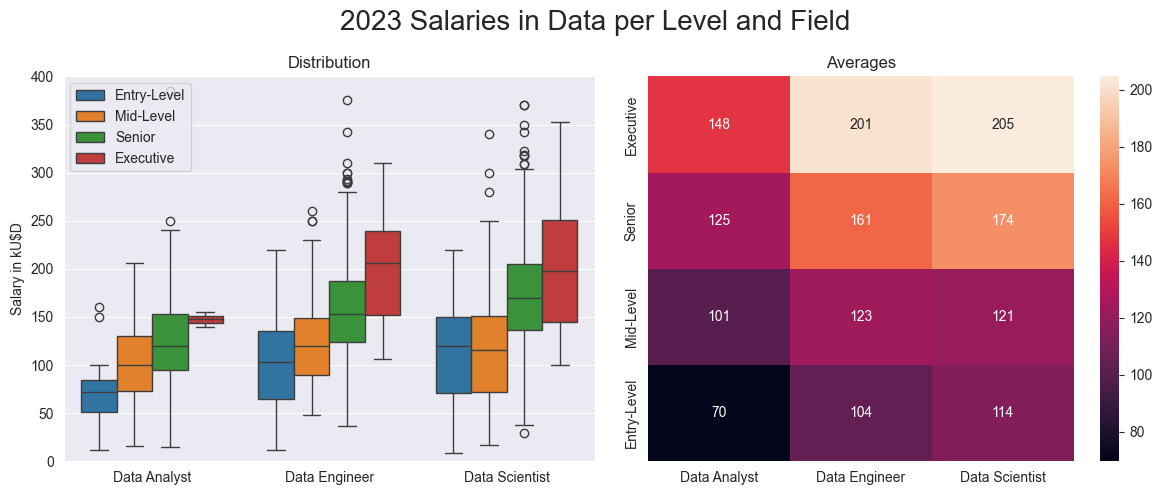

In [24]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle('2023 Salaries in Data per Level and Field', fontsize = 20)

#Creating boxplot with every job
sns.boxplot(
    ax = axes[0],
    data = df_2023, 
    x = 'field',
    hue = 'experience_level',
    y = 'salary_in_kusd',
    hue_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive'],
    order = ['Data Analyst', 'Data Engineer', 'Data Scientist']
)
axes[0].set_ylabel('Salary in kU$D')
axes[0].set_xlabel('')
axes[0].set_ylim((0, 400))
axes[0].legend(title = '', bbox_to_anchor = (0,1), loc = 'upper left')
axes[0].set_title('Distribution')


# Creating heatmap with averages
sns.heatmap(
    ax = axes[1],
    data = mean_pay,
    annot = True,
    fmt = '.0f'
)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_title('Averages')
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1)


# 2023 Remote Workers

In [28]:
df_2023['ratio_class'].value_counts(normalize=True)

ratio_class
In-Person    0.646321
Remote       0.336566
Hybrid       0.017114
Name: proportion, dtype: float64

In [21]:
# Calculate the count of each 'ratio_class' for each 'experience_level'
remote_grouped = df_2023.groupby(['field', 'ratio_class']).size()

# Reshape the DataFrame
remote_unstacked = remote_grouped.unstack()


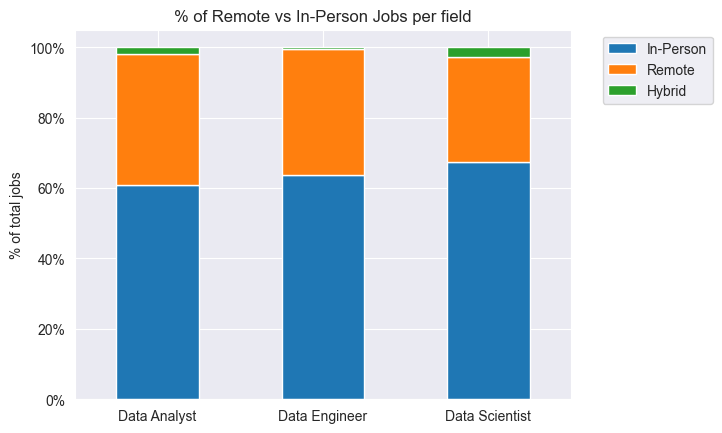

In [22]:
remote_normalized = remote_unstacked.div(remote_unstacked.sum(axis=1), axis=0)
ax = remote_normalized[['In-Person','Remote', 'Hybrid']].plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('% of total jobs')
ax.set_xlabel('')
ax.set_title('% of Remote vs In-Person Jobs per field')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# General Conclusions

## Jobs Growth
- The number of Data-related jobs grew exponentially from 2020 to 2023
- Although the 3 big areas
- Great growth in job numbers for all the fields.
- Senior positions are the most required and the ones that grew the most in the last three years
- The proportion between analysts, scientists and Engineers are relatively stable
  
## Job Locations
- The majority of the jobs are listed from USA. This might be caused by the data source. If it comes from LinkedIN, for example
  
## Salary Growth
- Increase in average salary through all the experience levels and fields
- Scientists and Engineers usually earn more than Analysts. On average an Mid-Level Scientst or Engineer will earn as much as a Senior Analyst
  
## 2023 Salary Distribution
- Heatmap shows clearly the evolution both from Starting-Level -> Executive and from Analyst-> Scientist

## Remote Workers
- The proportion of Remote vs In-Pearson is similar in all the 3 fields, being around 65% In person, 33% remote and 2% Hybrid
